Machine Learning for Breast Cancer Detection

Prepared by: S11-Group 4

Members: Arco, Canayon, Javid, Pangan, Tayzon

The dataset encompasses features related to breast cancer cells. Each entry is uniquely identified by an "id." The diagnosis column signifies whether the cell sample is malignant (M) or benign (B), the target variable for prediction.

**The dataset includes these features:**

Mean Values: Columns like radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, and fractal_dimension_mean reflect the mean characteristics measured from the cells in the biopsy sample.

Standard Error Values: Columns like radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, and fractal_dimension_se express the standard error of the mean for each characteristic, offering insights into the precision of these mean values.

Worst Values: Columns like radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, and fractal_dimension_worst represent the worst-case scenario, detailing the largest values among the cells for each feature.

In terms of pre-processing, the "diagnosis" column has undergone processing. Instead of using "M" and "B" to represent malignant and benign, respectively, OneHotEncoder has been used to change them to 1.0 and 0.0 respectively.

The purpose of this report is to utilize Logistic Regression and K Nearest Neighbor for the detection of cancer type, distinguishing between malignant and benign categories based on the mean values of the characteristics associated with cancer cells.

The subject is intriguing for the group considering the persistent prevalence of breast cancer. The group is curious whether a machine learning model could efficiently and accurately diagnose tumors based on their characteristics.

Only run these lines of code if you're using Google CoLab. Disregard these if you're using Jupyter Notebook.

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the necessary libraries:

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

(FOR JUPYTER NOTEBOOK): In case the importing of libraries doesn't work, install the following (run this in python):
!pip install pandas
!pip install numpy matplotlib
!pip install seaborn
!pip install statsmodels

You may download the dataset [here](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data).

[IF USING GOOGLE COLAB]

1. Please go to [this link](https://docs.google.com/document/d/1KRK9C1r4av7jfUEe-ldVSdAs-PtXMsYTDoMx7GV0_To/edit?usp=sharing) and follow its instructions.

[IF USING JUPYTER NOTEBOOK]
1. Run the following code instead (ensuring that both the CSV file and the notebook are saved in the same folder):

    dataset = pd.read_csv("breast-cancer.csv")


In [50]:
dataset = pd.read_csv("/content/drive/MyDrive/breast-cancer/breast-cancer.csv")

Next, use the head method to print some samples from the dataset. Feel free to change the value of 'n' if you want to check more samples from the dataset.

In [51]:
dataset.head(n = 3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


Now, call the info method to show the details of the imported dataset. This is to check what are the data types used per column and how many cells are non-null (has a value inside a cell). The dataset shall have 569 non-null values for each column, and a total of 32 columns.

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Check how many benign and malignant cases are there in the dataset. B represents benign and M represent malignant.

In [53]:
dataset['diagnosis'].value_counts(dropna = False)

B    357
M    212
Name: diagnosis, dtype: int64

Use the OneHotEncoder to change the labels used in the diagnosis from B and M to 0.0 to 1.0 respectively.

In [54]:
dataset['diagnosis'] = OneHotEncoder(drop='first').fit_transform(dataset[['diagnosis']]).toarray()

Double check if the diagnosis table is changed accordingly.

In [55]:
dataset['diagnosis'].value_counts(dropna = False)

0.0    357
1.0    212
Name: diagnosis, dtype: int64

The provided code segment performs the partitioning of the dataset into two components: X (features) and y (output).

The train_test_split function is employed to effectively divide the dataset into training and testing subsets. The inclusion of the random_state parameter in this function ensures consistency across multiple runs of the code, guaranteeing that the same split is obtained each time.

Additionally, the utilization of stratify=y within the train_test_split function serves the purpose of maintaining a proportional representation of both malignant and benign samples in both the training and testing datasets. This is a crucial step, particularly when confronted with datasets exhibiting imbalances in class distribution, as it contributes to a more equitable assessment of model performance.

In [56]:
features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean",
            "smoothness_mean", "compactness_mean", "concavity_mean",
            "concave points_mean", "symmetry_mean", "fractal_dimension_mean"]

X = dataset[features]
y = dataset["diagnosis"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50,  stratify=y)

The first algorithm to be presented will be LOGISTIC REGRESSION:

Develop and train a machine learning model using scikit-learn's Logistic Regression. The provided parameters are:

X_train: Comprising the feature set for training.

y_train: Encompassing the output set for training.

In [57]:
logres = LogisticRegression(max_iter = 1000).fit(X_train,y_train)

Now, after training the model, let's plot the relationship between each feature used in the training set and the diagnosis. The seaborn library is used for this. The method regplot() is used. The X parameter indicates the feature and the y parameter indicates the output. The Data parameter indicates where the data will be coming from. The logistic parameter indicates that logistics regression will be applied to the data. In a logistic regression plot, Seaborn will attempt to fit a logistic curve to visualize the relationship between the feature and output. This parameter disables the confidence interval around the regression line.

<Axes: xlabel='radius_mean', ylabel='diagnosis'>

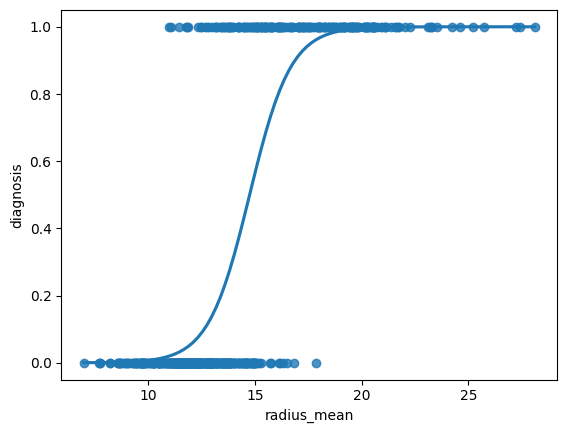

In [58]:
sns.regplot(x="radius_mean", y="diagnosis", data=dataset, logistic=True, ci=None)

<Axes: xlabel='texture_mean', ylabel='diagnosis'>

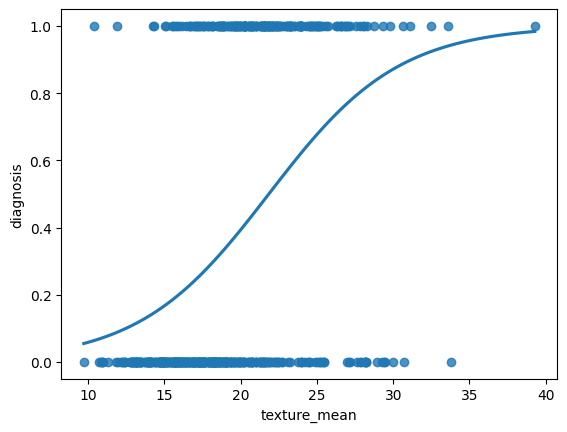

In [59]:
sns.regplot(x="texture_mean", y="diagnosis", data=dataset, logistic=True, ci=None)

<Axes: xlabel='perimeter_mean', ylabel='diagnosis'>

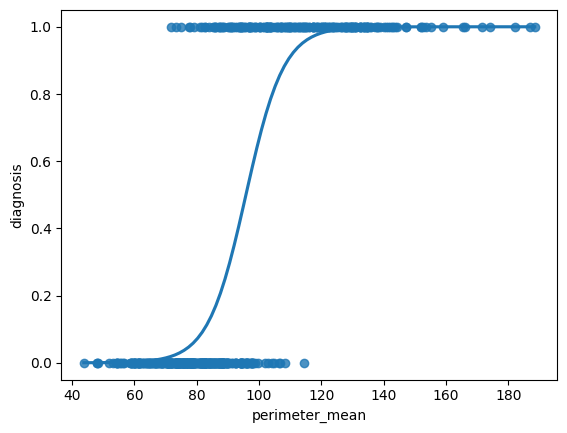

In [60]:
sns.regplot(x="perimeter_mean", y="diagnosis", data=dataset, logistic=True, ci=None)

<Axes: xlabel='area_mean', ylabel='diagnosis'>

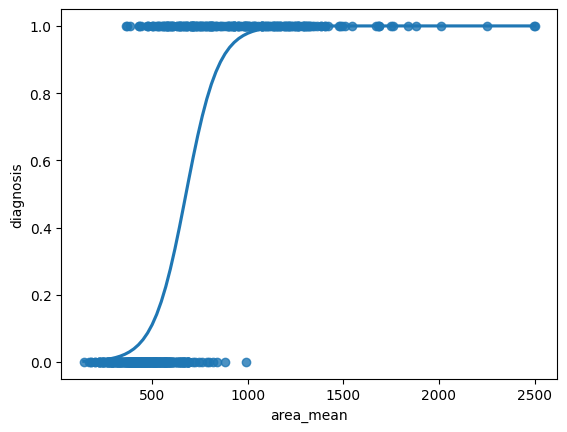

In [61]:
sns.regplot(x="area_mean", y="diagnosis", data=dataset, logistic=True, ci=None)

<Axes: xlabel='smoothness_mean', ylabel='diagnosis'>

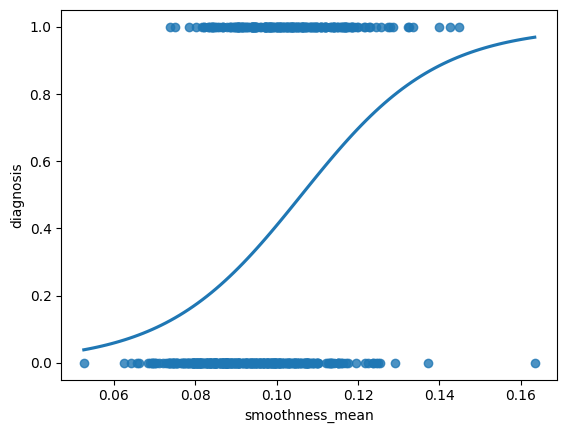

In [62]:
sns.regplot(x="smoothness_mean", y="diagnosis", data=dataset, logistic=True, ci=None)

<Axes: xlabel='compactness_mean', ylabel='diagnosis'>

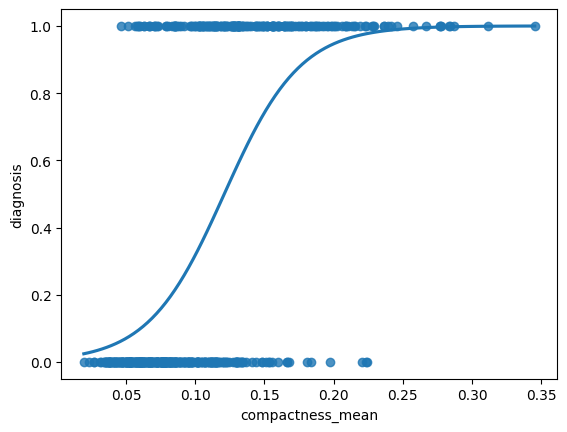

In [63]:
sns.regplot(x="compactness_mean", y="diagnosis", data=dataset, logistic=True, ci=None)

<Axes: xlabel='concavity_mean', ylabel='diagnosis'>

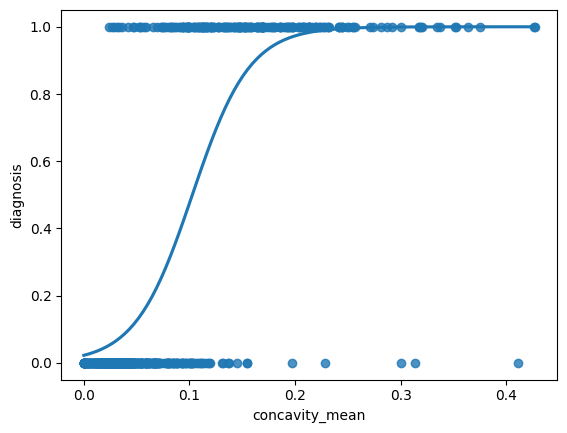

In [64]:
sns.regplot(x="concavity_mean", y="diagnosis", data=dataset, logistic=True, ci=None)

<Axes: xlabel='concave points_mean', ylabel='diagnosis'>

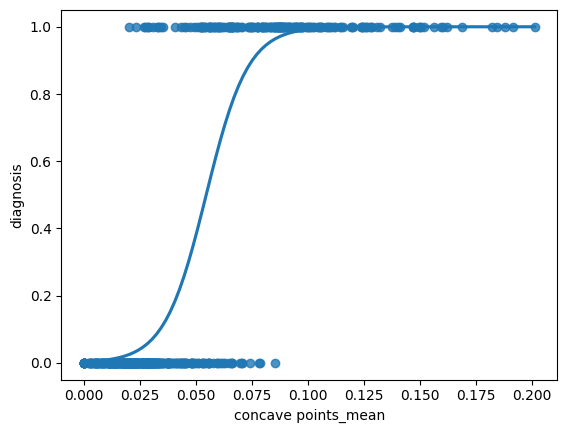

In [65]:
sns.regplot(x="concave points_mean", y="diagnosis", data=dataset, logistic=True, ci=None)

<Axes: xlabel='symmetry_mean', ylabel='diagnosis'>

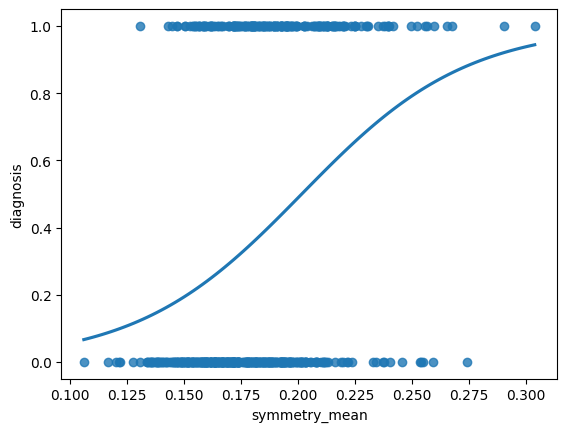

In [66]:
sns.regplot(x="symmetry_mean", y="diagnosis", data=dataset, logistic=True, ci=None)

<Axes: xlabel='fractal_dimension_mean', ylabel='diagnosis'>

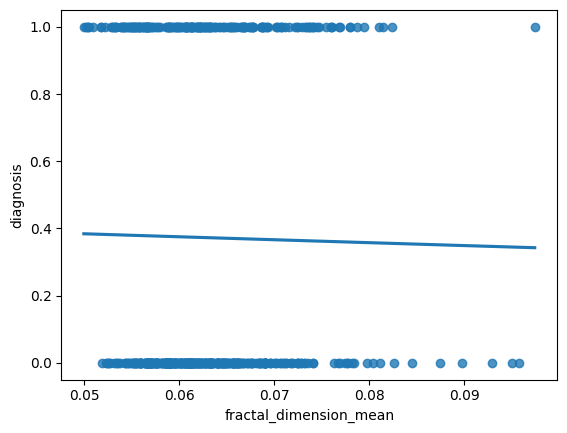

In [67]:
sns.regplot(x="fractal_dimension_mean", y="diagnosis", data=dataset, logistic=True, ci=None)

Call the trained machine learning model to predict the diagnosis of the feature set for testing and print the prediction.

In [68]:
y_prediction = logres.predict(X_test)

print(y_prediction)

[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0.]


Print the expected diagnosis result.

In [69]:
print(y_test)

292    0.0
547    0.0
402    0.0
184    1.0
350    0.0
      ... 
226    0.0
279    0.0
304    0.0
165    0.0
270    0.0
Name: diagnosis, Length: 171, dtype: float64


Compute the accuracy, precision, recall, and F1 score to evaluate the performance of the learning model.

In [70]:
print("Accuracy: {:.2%}".format(metrics.accuracy_score(y_test, y_prediction)))
print("Precision: {:.2%}".format(metrics.precision_score(y_test, y_prediction)))
print("Recall: {:.2%}".format(metrics.recall_score(y_test, y_prediction)))
print("F1 Score: {:.2%}".format(metrics.f1_score(y_test, y_prediction)))

Accuracy: 92.98%
Precision: 93.33%
Recall: 87.50%
F1 Score: 90.32%


Create the confusion matrix.

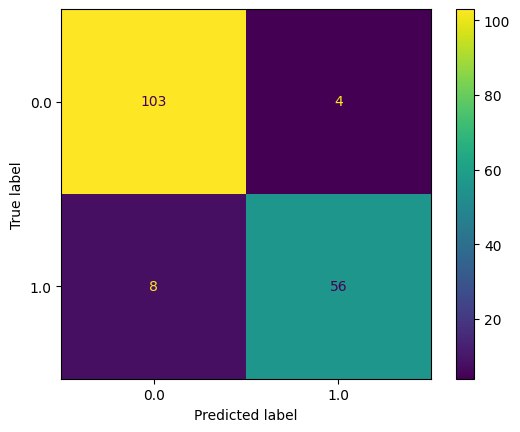

In [71]:
confusionmatrix = metrics.confusion_matrix(y_test, y_prediction, labels = logres.classes_)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionmatrix,display_labels = logres.classes_)
display.plot()

Notes: 0.0 is benign (non-cancerous), 1.0 is malignant

Findings and recommendations for Logistics Regression:

1. The model exhibits reasonably high accuracy, precision, recall, and F1 score. However, given the medical nature of the dataset, it is imperative to strive for even higher scores to enhance diagnostic correctness.

2. The proportion of true-malignant to false-malignant and true-benign to false-benign is noteworthy. This indicates a relatively robust performance in distinguishing between malignant and benign cases.

3. While the model demonstrates reliability in identifying the correct cancer type, it is essential to underscore the importance of a physician's expertise in the diagnostic process.

4. To further strengthen the model's performance, consider obtaining a dataset with a more extensive array of instances. This will ensure a more comprehensive training of the model, contributing to enhanced accuracy in real-world scenarios.

The next machine learning algorithm will be K Nearest Neighbor for Breast Cancer Detection

This code below initializes a StandardScaler and uses it to standardize the training features (X_train), resulting in X_train_scaled containing the standardized feature values. Standardization is a common preprocessing step in machine learning to ensure that features are on a similar scale, which can improve the performance of certain algorithms.

You can then take the testing features (X_test) and scale them using the same scaler that was fitted to the training features. Standardizing the testing features ensures consistency in the scaling across both training and testing datasets, which is crucial for making accurate predictions with machine learning models.

In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

📌 This code initializes a KNN classifier with the number of neighbors set to 5, preparing it for training on the standardized training features and corresponding target variable. The choice of 5 neighbors is a common default but can be adjusted based on the characteristics of the dataset and the problem at hand.

In [73]:
n_neighbors = 5
knn_classifier = KNeighborsClassifier(n_neighbors)

This code trains the KNN classifier using the standardized training features (X_train_scaled) and their corresponding target variable (y_train). The model is now ready to make predictions based on the patterns it has learned from the training data.

In [74]:
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

This code generates predictions (y_pred) for the target variable using the KNN classifier trained on the standardized training features. These predictions are based on the patterns learned during the training phase and are evaluated against the true values in the testing dataset to assess the model's performance.

In [75]:
y_pred = knn_classifier.predict(X_test_scaled)

Compute the accuracy, precision, recall, and F1 score to evaluate the performance of the learning model.

In [76]:
print('\n\n==K NEAREST NEIGHBORS RESULTS:==\n')

print("When k: {}".format(n_neighbors))
print("Accuracy: {:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision: {:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("F1 Score: {:.2%}".format(metrics.f1_score(y_test, y_pred)))



==K NEAREST NEIGHBORS RESULTS:==

When k: 5
Accuracy: 94.15%
Precision: 95.00%
Recall: 89.06%
F1 Score: 91.94%


Create the confusion matrix.

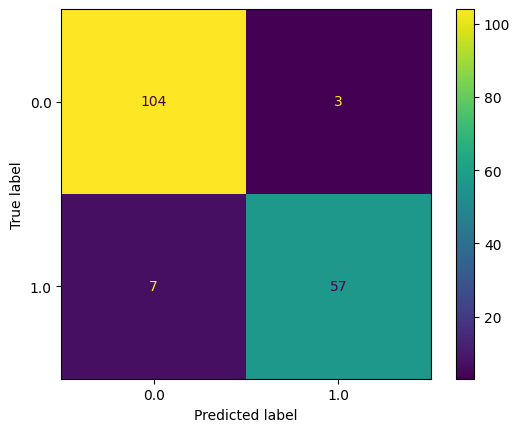

In [77]:
y_pred = knn_classifier.predict(X_test_scaled)
conf_matrix_knn = confusion_matrix(y_test, y_pred)
display_knn = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=np.unique(y_test))
display_knn.plot()

Findings and recommendations for K Nearest Neighbors

1. The performance of the KNN algorithm changes according to the value of k.

When k = 6
- Accuracy peaks at 95.32%
- Precision peaks at 100.00%
- F1 Score peaks at 93.33%

When k = 7
- Recall peaks at 89.06%

However this result is also attainable when k = 3. Thus, when using the KNN algorithm, it is recommended that measuring its performance involves testing certain values of k.

NOTES:
1. The results above were only tested for this case.
2. K was only tested for values 2-7.


COMPARATIVE ANALYSIS:

1. Based on the results of the KNN's performance, we conclude that KNN is a more efficient and effective algorithm than logistic regression.
   This is because KNN has higher scores on all metrics: accuracy, precision, F1 score, and recall.

2. Similar to the findings and recommendations in Logistic Regression, we recommend that a medical professional is still consulted despite the results
   of KNN. Moreover, utilizing a data set of significantly more instances is also advised for a more comprehensive training of the model to enhance its
   accuracy.

Dataset was downloaded from: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data